In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
import scipy.stats as stats

In [2]:
! pwd

/Users/gabrielwarner/Data-Science/Projects/phase_2/bsc-phase-two-project/notebooks/exploratory/Gabe


In [3]:
path = '../../../data/kc_house_data.csv'
df = pd.read_csv(path)

### Examine Data Types

In [4]:
df.dtypes
#bedroom, bathroom, waterfront, floors, view, condition, sqft_above, sqft_below, yr_built, yr, renovated, sqft living, sqft lot

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Data Cleaning

In [5]:
#dropped rows with ? in the sqft_basement column
df = df[~df['sqft_basement'].isin(['?'])]

In [6]:
#how many Nan values
df.isna().sum().sum()

6154

In [7]:
#remove rows with null values
df = df.dropna()

In [8]:
df['price'] = df['price'].astype(int)

### Correlation between bedrooms and price

In [9]:
#Correlation between bedrooms and price
#fig, ax = plt.subplots(figsize=(12,10))
#sns.scatterplot(x=df['bedrooms'], y=df['price'], ax=ax)
#ax.set_title('Correlation Between Bedrooms and Price', fontsize=18)
#ax.set_ylabel('Price', fontsize=15)
#ax.set_xlabel('Number of Bedrooms', fontsize=15);

### Correlation between bathroom and price

In [10]:
#Correlation between bathroom and price
#fig, ax = plt.subplots(figsize=(12,10))
#sns.scatterplot(x=df['bathrooms'], y=df['price'], ax=ax)
#ax.set_title('Correlation Between Bathrooms and Price', fontsize=18)
#ax.set_ylabel('Price', fontsize=15)
#ax.set_xlabel('Bathrooms', fontsize=15);

### Mean house price of each zipcode

In [11]:
price_zipcode = df[['price', 'zipcode']].copy()

In [12]:
#Mean price of each zip code
zip_price_mean = price_zipcode.groupby('zipcode').mean()

In [13]:
#sns.lineplot(x = "zipcode", y = "price", data = price_zipcode)
#plt.show()

In [14]:
#sns.scatterplot(x = "zipcode", y = "price", data = price_zipcode)
#plt.show()

### Condition Feature Examination

In [15]:
#Correlation to price is 0.036056b

In [16]:
condition_price = df[['price', 'condition']].copy()
#conditions are on a 1-5 scale

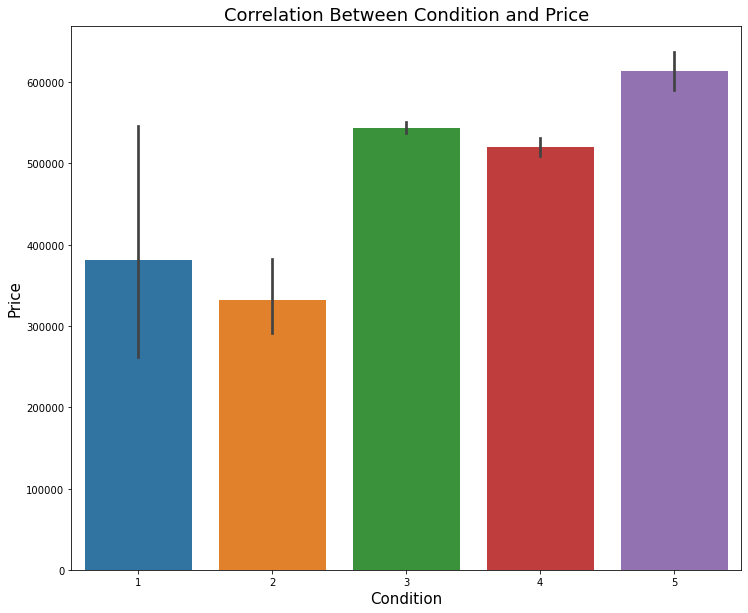

In [17]:
#Correlation between condition and price
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x=df['condition'], y=df['price'], ax=ax)
ax.set_title('Correlation Between Condition and Price', fontsize=18)
ax.set_ylabel('Price', fontsize=15)
ax.set_xlabel('Condition', fontsize=15);

A condition of 5 has the highest price

### sqft_above Feature Examination

In [18]:
#Correlation to price is 0.605368
sqft_above_price = df[['price', 'sqft_above']].copy()

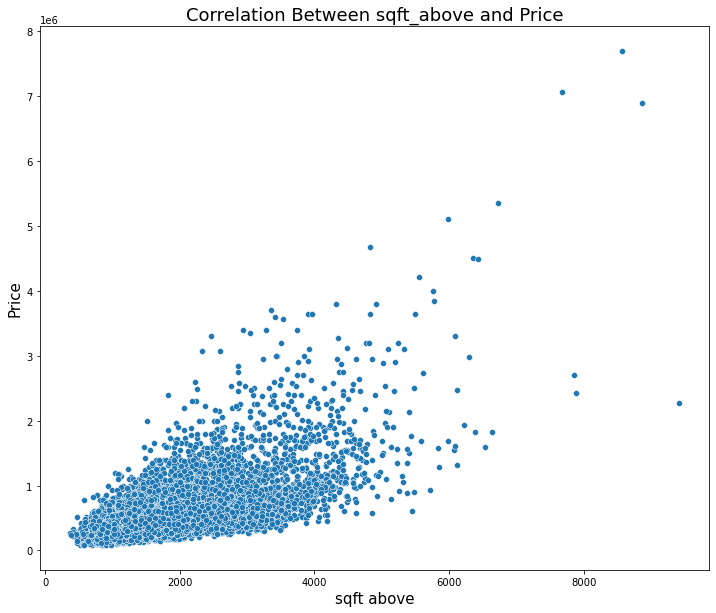

In [19]:
#Correlation between sqft_above and price
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_above'], y=df['price'], ax=ax)
ax.set_title('Correlation Between sqft_above and Price', fontsize=18)
ax.set_ylabel('Price', fontsize=15)
ax.set_xlabel('sqft above', fontsize=15);

### yr_built Feature Examination

In [20]:
#Correlation to price is 0.053953
yr_built_price = df[['price', 'yr_built']].copy()

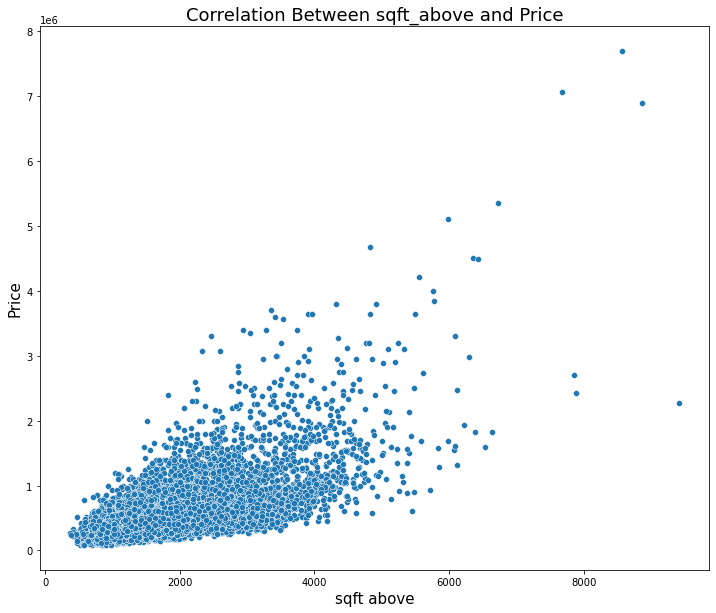

In [21]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_above'], y=df['price'], ax=ax)
ax.set_title('Correlation Between sqft_above and Price', fontsize=18)
ax.set_ylabel('Price', fontsize=15)
ax.set_xlabel('sqft above', fontsize=15);

### Model #1 (price and condition)

In [22]:
# Isolate independent and depdentent variables 
X = df.drop('price', axis = 1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

In [23]:
#isolate the features sqft_living15 and yr_built
model_1_train = X_train[['sqft_living15',
                         'yr_built']]

model_1_test = X_test[['sqft_living15',
                       'yr_built']]

# Initialize a model
model1 = LinearRegression()

# Fit the model
model1.fit(model_1_train, y_train)

# Generate training and test predictions
train_preds = model1.predict(model_1_train)
test_preds = model1.predict(model_1_test)

# Calculate training and test error
train_error = mean_squared_error(y_train, train_preds)
test_error = mean_squared_error(y_test, test_preds)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)

Train error: 88039347735.41335
Test error: 91393309871.96782
Difference: 3353962136.554474


### Model 2 (yr_built, sqft_living15, sqft_above)

In [24]:
def model(X_train, X_test, y_train, y_test, features):
    # Isolate the features for the first model
    model_train = X_train[features]
    model_test = X_test[features]
    
    # Initialize a model
    model = LinearRegression()
    
    # Fit the model
    model.fit(model_train, y_train)
    
    # Generate training and test predictions
    train_preds = model.predict(model_train)
    test_preds = model.predict(model_test)
    
    # Calculate training and test error
    train_error = mean_squared_error(y_train, train_preds)
    test_error = mean_squared_error(y_test, test_preds)
    
    # What is the difference in training and test error?
    difference = test_error - train_error
    
    # return results
    return train_error, test_error, difference

second_model_features = ["yr_built", 'sqft_living15',
                         'sqft_above']
model_2_results = model(X_train, X_test, y_train, y_test, second_model_features)
model_2_results

(73018820975.37392, 76847494575.65646, 3828673600.282547)

### Model 3 (yr_built, sqft_living15, sqft_above, condition)

In [25]:
#OHE for condition (1-5 scale)
# Initialize a One Hot Encoder
ohe = OneHotEncoder(sparse=False)

# Fir the encoder to the training data
ohe.fit(X_train[['condition']])

# Transform the borough column
train_condition = ohe.transform(X_train[['condition']])
             
# Turn the transformed data into a dataframe
# so we can add it to the end of our training dataframe
train_condition = pd.DataFrame(train_condition, 
                        # This is how you get
                        # the feature name from
                        # a one hot encoder              # Set the index so it matched the training data
                        columns=ohe.get_feature_names(), index=X_train.index)

# Add the transformed columns to the X_train dataframe
train_condition = pd.concat([X_train.drop('condition', axis = 1), train_condition], axis = 1)

# Transform the testing data
test_condition = ohe.transform(X_test[['condition']])

# Turn the transformed data into a dataframe
test_condition = pd.DataFrame(test_condition, 
                        columns=ohe.get_feature_names(), index=X_test.index)

# Add the transformed columns to the X_test dataframe
test_condition = pd.concat([X_test.drop('condition', axis = 1), test_condition], axis = 1)

In [26]:
#OHE column names 
ohe.get_feature_names().tolist()

['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5']

In [27]:
model_three_features = ["yr_built", 'sqft_living15',
                        'sqft_above','x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5']

model_3_results = model(train_condition, test_condition, y_train, y_test, model_three_features)

In [28]:
print('Model 2:', model_2_results)
print('Model 3:', model_3_results)

Model 2: (73018820975.37392, 76847494575.65646, 3828673600.282547)
Model 3: (72508284345.23311, 76244429903.7052, 3736145558.4720917)


### Model 4 (yr_built, sqft_living15, sqft_above, condition, zipcode)

In [29]:
#OHE for zipcode 
# Initialize a One Hot Encoder
ohe = OneHotEncoder(sparse=False)

# Fir the encoder to the training data
ohe.fit(X_train[['zipcode']])

# Transform the borough column
train_zipcode = ohe.transform(X_train[['zipcode']])
             
# Turn the transformed data into a dataframe
# so we can add it to the end of our training dataframe
train_zipcode = pd.DataFrame(train_zipcode, 
                        # This is how you get
                        # the feature name from
                        # a one hot encoder              # Set the index so it matched the training data
                        columns=ohe.get_feature_names(), index=X_train.index)

# Add the transformed columns to the X_train dataframe
train_zipcode = pd.concat([X_train.drop('zipcode', axis = 1), train_zipcode], axis = 1)


# Transform the testing data
test_zipcode = ohe.transform(X_test[['zipcode']])

# Turn the transformed data into a dataframe
test_zipcode = pd.DataFrame(test_zipcode, 
                        columns=ohe.get_feature_names(), index=X_test.index)


# Add the transformed columns to the X_test dataframe
test_zipcode = pd.concat([X_test.drop('zipcode', axis = 1), test_zipcode], axis = 1)

test_zipcode = pd.concat([test_zipcode, test_condition], axis = 1)
train_zipcode = pd.concat([train_zipcode, train_condition], axis = 1)

In [30]:
#OHE column names 
#ohe.get_feature_names().tolist()

In [31]:
#yr_built, sqf_living15, sqft_above, condition, zipcode
model_four_features = ["yr_built", 'sqft_living15',
                        'sqft_above','x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_98001','x0_98002','x0_98003','x0_98004','x0_98005','x0_98006','x0_98007','x0_98008','x0_98010','x0_98011','x0_98014','x0_98019','x0_98022','x0_98023','x0_98024','x0_98027','x0_98028','x0_98029','x0_98030','x0_98031','x0_98032','x0_98033','x0_98034','x0_98038','x0_98039','x0_98040','x0_98042','x0_98045','x0_98052','x0_98053','x0_98055','x0_98056','x0_98058','x0_98059','x0_98065','x0_98070','x0_98072','x0_98074','x0_98075','x0_98077','x0_98092','x0_98102','x0_98103','x0_98105','x0_98106','x0_98107','x0_98108','x0_98109','x0_98112','x0_98115','x0_98116','x0_98117','x0_98118','x0_98119','x0_98122','x0_98125','x0_98126','x0_98133','x0_98136','x0_98144','x0_98146','x0_98148','x0_98155','x0_98166','x0_98168','x0_98177','x0_98178','x0_98188','x0_98198','x0_98199']

model_4_results = model(train_zipcode, test_zipcode, y_train, y_test, model_four_features)

print('Model 3:', model_3_results)
print('Model 4:', model_4_results)

Model 3: (72508284345.23311, 76244429903.7052, 3736145558.4720917)
Model 4: (41359846205.11828, 42210477163.03546, 850630957.9171829)


### Drop Outliers in price column

In [32]:
price_under_3_std = df[np.abs(stats.zscore(df['price'])) < 3]


<AxesSubplot:xlabel='price'>

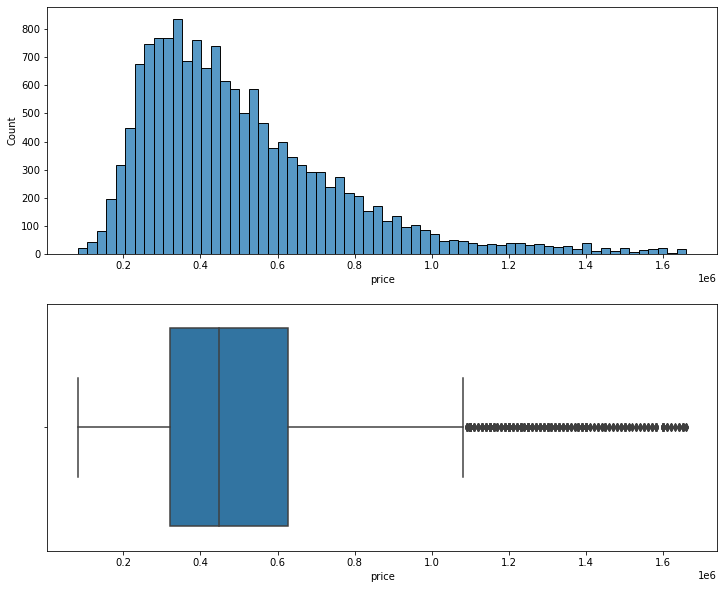

In [33]:
fig, ax = plt.subplots(figsize=(12,10), nrows=2)
sns.histplot(x=price_under_3_std['price'], ax=ax[0])
sns.boxplot(x=price_under_3_std['price'], ax=ax[1])

### Model 5(new train, test, split)

In [34]:
# Isolate independent and depdentent variables 
X = price_under_3_std.drop('price', axis = 1)
y = price_under_3_std['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)

In [35]:
#isolate the features sqft_living15 and yr_built
model_5_train = X_train[['sqft_living15',
                         'yr_built']]

model_5_test = X_test[['sqft_living15',
                       'yr_built']]

# Initialize a model
model5 = LinearRegression()

# Fit the model
model5.fit(model_5_train, y_train)

# Generate training and test predictions
train_preds = model5.predict(model_5_train)
test_preds = model5.predict(model_5_test)

# Calculate training and test error
train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)

Train error: 206125.20632892518
Test error: 207181.47315121721
Difference: 1056.2668222920329


### Model 6 (yr_built, sqft_living15, sqft_above)

In [36]:
def model(X_train, X_test, y_train, y_test, features):
    # Isolate the features for the first model
    model_train = X_train[features]
    model_test = X_test[features]
    
    # Initialize a model
    model = LinearRegression()
    
    # Fit the model
    model.fit(model_train, y_train)
    
    # Generate training and test predictions
    train_preds = model.predict(model_train)
    test_preds = model.predict(model_test)
    
    # Calculate training and test error
    train_error = mean_squared_error(y_train, train_preds)
    test_error = mean_squared_error(y_test, test_preds)
    
    # What is the difference in training and test error?
    difference = test_error - train_error
    
    # return results
    return train_error, test_error, difference

sixth_model_features = ["yr_built", 'sqft_living15',
                         'sqft_above']
model_6_results = model(X_train, X_test, y_train, y_test, sixth_model_features)
model_6_results

(37868833722.04776, 38420294430.516174, 551460708.4684143)

### Model 7 (yr_built, sqft_living15, sqft_above, condition)

In [37]:
#OHE for condition (1-5 scale)
# Initialize a One Hot Encoder
ohe = OneHotEncoder(sparse=False)

# Fir the encoder to the training data
ohe.fit(X_train[['condition']])

# Transform the borough column
train_condition = ohe.transform(X_train[['condition']])
             
# Turn the transformed data into a dataframe
# so we can add it to the end of our training dataframe
train_condition = pd.DataFrame(train_condition, 
                        # This is how you get
                        # the feature name from
                        # a one hot encoder              # Set the index so it matched the training data
                        columns=ohe.get_feature_names(), index=X_train.index)

# Add the transformed columns to the X_train dataframe
train_condition = pd.concat([X_train.drop('condition', axis = 1), train_condition], axis = 1)

# Transform the testing data
test_condition = ohe.transform(X_test[['condition']])

# Turn the transformed data into a dataframe
test_condition = pd.DataFrame(test_condition, 
                        columns=ohe.get_feature_names(), index=X_test.index)

# Add the transformed columns to the X_test dataframe
test_condition = pd.concat([X_test.drop('condition', axis = 1), test_condition], axis = 1)

In [38]:
model_seven_features = ["yr_built", 'sqft_living15',
                        'sqft_above','x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5']

model_7_results = model(train_condition, test_condition, y_train, y_test, model_seven_features)
model_7_results

(37408884193.97755, 38078886741.95462, 670002547.9770737)

### Model 8 (yr_built, sqft_living15, sqft_above, condition, zipcode)

In [56]:
#OHE for zipcode 
# Initialize a One Hot Encoder
ohe = OneHotEncoder(sparse=False)

# Fir the encoder to the training data
ohe.fit(X_train[['zipcode']])

# Transform the borough column
train_zipcode = ohe.transform(X_train[['zipcode']])
             
# Turn the transformed data into a dataframe
# so we can add it to the end of our training dataframe
train_zipcode = pd.DataFrame(train_zipcode, 
                        # This is how you get
                        # the feature name from
                        # a one hot encoder              # Set the index so it matched the training data
                        columns=ohe.get_feature_names(), index=X_train.index)

# Add the transformed columns to the X_train dataframe
train_zipcode = pd.concat([X_train.drop('zipcode', axis = 1), train_zipcode], axis = 1)


# Transform the testing data
test_zipcode = ohe.transform(X_test[['zipcode']])

# Turn the transformed data into a dataframe
test_zipcode = pd.DataFrame(test_zipcode, 
                        columns=ohe.get_feature_names(), index=X_test.index)


# Add the transformed columns to the X_test dataframe
test_zipcode = pd.concat([X_test.drop('zipcode', axis = 1), test_zipcode], axis = 1)

test_zipcode = pd.concat([test_zipcode, test_condition], axis = 1)
train_zipcode = pd.concat([train_zipcode, train_condition], axis = 1)

# Calculate training and test error
train_error = mean_squared_error(y_train, train_preds, squared=False)
test_error = mean_squared_error(y_test, test_preds, squared=False)
# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)

Train error: 206125.20632892518
Test error: 207181.47315121721
Difference: 1056.2668222920329


In [57]:
#yr_built, sqf_living15, sqft_above, condition, zipcode
model_eight_features = ["yr_built", 'sqft_living15',
                        'sqft_above','x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_98001','x0_98002','x0_98003','x0_98004','x0_98005','x0_98006','x0_98007','x0_98008','x0_98010','x0_98011','x0_98014','x0_98019','x0_98022','x0_98023','x0_98024','x0_98027','x0_98028','x0_98029','x0_98030','x0_98031','x0_98032','x0_98033','x0_98034','x0_98038','x0_98039','x0_98040','x0_98042','x0_98045','x0_98052','x0_98053','x0_98055','x0_98056','x0_98058','x0_98059','x0_98065','x0_98070','x0_98072','x0_98074','x0_98075','x0_98077','x0_98092','x0_98102','x0_98103','x0_98105','x0_98106','x0_98107','x0_98108','x0_98109','x0_98112','x0_98115','x0_98116','x0_98117','x0_98118','x0_98119','x0_98122','x0_98125','x0_98126','x0_98133','x0_98136','x0_98144','x0_98146','x0_98148','x0_98155','x0_98166','x0_98168','x0_98177','x0_98178','x0_98188','x0_98198','x0_98199']

model_8_results = model(train_zipcode, test_zipcode, y_train, y_test, model_eight_features)

print('Model 7:', model_7_results)
print('Model 8:', model_8_results)

Model 7: (37408884193.97755, 38078886741.95462, 670002547.9770737)
Model 8: (16000045074.432446, 16574752397.595247, 574707323.1628017)


### Removing Outliers yr_built

<AxesSubplot:xlabel='yr_built'>

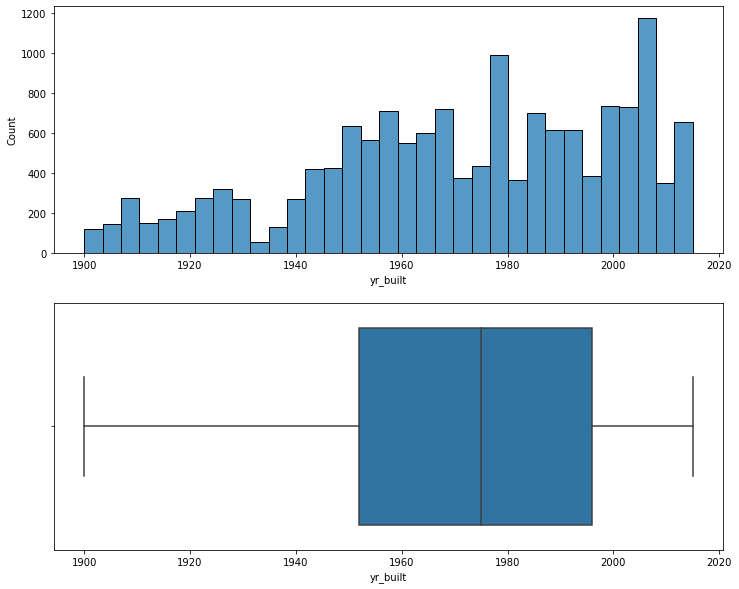

In [41]:
fig, ax = plt.subplots(figsize=(12,10), nrows=2)
sns.histplot(x=price_under_3_std['yr_built'], ax=ax[0])
sns.boxplot(x=price_under_3_std['yr_built'], ax=ax[1])

In [42]:
yr_built_under_3_std = price_under_3_std[np.abs(stats.zscore(price_under_3_std['yr_built'])) < 3]

<AxesSubplot:xlabel='yr_built'>

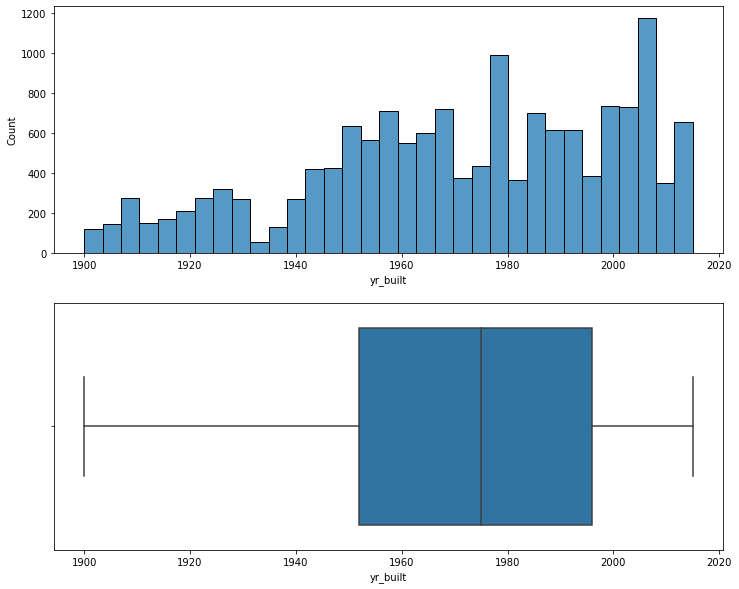

In [43]:
fig, ax = plt.subplots(figsize=(12,10), nrows=2)
sns.histplot(x=yr_built_under_3_std['yr_built'], ax=ax[0])
sns.boxplot(x=yr_built_under_3_std['yr_built'], ax=ax[1])

### Model 8 Evaluation

In [44]:
#def model_eval(model, x, y)
    #bins = 

In [45]:
bined = pd.qcut(yr_built_under_3_std['price'], q=8)
binned_df = pd.DataFrame(bined)

In [46]:
binned_df['price'].value_counts()

(258000.0, 320000.0]     1963
(81999.999, 258000.0]    1895
(527000.0, 627000.0]     1895
(627000.0, 797000.0]     1894
(448500.0, 527000.0]     1893
(797000.0, 1660000.0]    1893
(320000.0, 380000.0]     1862
(380000.0, 448500.0]     1858
Name: price, dtype: int64

In [47]:
lr = LinearRegression()

In [48]:
train_zipcode = train_zipcode.drop('date', axis=1)

In [49]:
lr.fit(train_zipcode, y_train)

LinearRegression()

In [50]:
e = lr.predict(train_zipcode) - y_train

In [51]:
binned_df['error'] = e

In [52]:
binned_df.head()

,price,error
1,"(527000.0, 627000.0]",39862.406344
3,"(527000.0, 627000.0]",-59411.121852
4,"(448500.0, 527000.0]",-10195.567150
5,"(797000.0, 1660000.0]",5304.340272
8,"(81999.999, 258000.0]",92339.399713


In [53]:
new_df = binned_df.groupby('price').mean()['error']
new_df

price
(81999.999, 258000.0]     -1834.464631
(258000.0, 320000.0]      11045.637836
(320000.0, 380000.0]      28684.566730
(380000.0, 448500.0]      28497.368689
(448500.0, 527000.0]      27110.827538
(527000.0, 627000.0]      16202.027305
(627000.0, 797000.0]      -1212.616650
(797000.0, 1660000.0]   -107158.214756
Name: error, dtype: float64

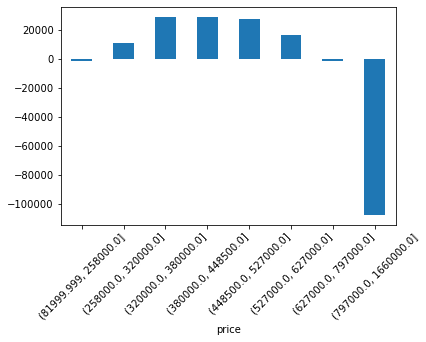

In [54]:
new_df.plot.bar(x='price', y='error', rot=45);